In [4]:
from gravipy.tensorial import Coordinates, MetricTensor, Christoffel, Ricci, Einstein, All
from sympy import symbols, Function, diag, sin, simplify, init_printing
import sympy as sp

In [ ]:
t, x, y, z = symbols('t x y z')
coords = Coordinates('\chi', [t, x, y, z])  
coord_symbols = [t, x, y, z]  

a = Function('a')(t)

# FLRW metric in Cartesian coordinates (flat universe)
Metric = diag(
    1,             
    -a**2,          
    -a**2,          
    -a**2           
)

In [31]:
g = MetricTensor('g', coords, Metric)
g_matrix = Matrix(Metric)
g_inv = simplify(g_matrix.inv())  # Inverse metric 

# Scalar field
Phi_field = Function('Phi')(t, x, y, z)

# Potential energy
V = Function('V')(Phi_field)

### Lagrangian defined as 
$$
\mathcal{L} = \frac{1}{2} g^{\mu \nu} \partial_{\mu}\phi \partial_{\nu}\phi - V(\phi),
$$

In [36]:
# sqrt(det(g)) = a^3 for FLRW in Cartesian coords
sqrtg = sqrt(Abs(g_matrix.det()))  

### the kinect term is given by 
$$
\frac{1}{2}g^{\mu \nu} \partial_{\mu} \phi \partial_{\nu} \phi
$$

In [37]:
# Compute kinetic term
L_kin = 0
for mu in range(4):
    for nu in range(4):
        dphi_mu = diff(Phi_field, coord_symbols[mu])  # partial of mu
        dphi_nu = diff(Phi_field, coord_symbols[nu])  # partial of nu
        L_kin += (1/2) * g_inv[mu, nu] * dphi_mu * dphi_nu

In [38]:
# Total Lagrangian density 
L_total = sqrtg * (L_kin - V)

### Now we use the E-L equation
$$
\frac{\partial}{\partial \phi} \mathcal{L} - \frac{\partial}{\partial_\mu} \left( \frac{\partial \mathcal{L}}{\partial (\partial_{\mu } \phi)}\right) = 0 
$$

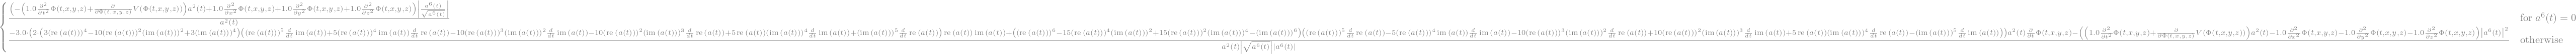

In [39]:
EL = diff(L_total, Phi_field)  # partial L/partial phi
for mu in range(4):
    dphi_mu = diff(Phi_field, coord_symbols[mu])  # partial_muphi using symbols list
    dL_ddphi = diff(L_total, dphi_mu)            # partialL/partial(partial_muphi)
    EL -= diff(dL_ddphi, coord_symbols[mu])      # partial_mu(partial L/partial(partial_mupsi))


EL = simplify(EL)
display(EL)